In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
cust_acq = pd.read_csv('C:/Users/91639/Documents/My file/Python files/Assignments - Case Studies/Credit Card Case Study/Customer Acqusition.csv')
cust_acq.head()

No Customer  Age       City   Product     Limit Company        Segment
0   1       A1   76  BANGALORE      Gold  500000.0      C1  Self Employed
1   2       A2   71   CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2   3       A3   34     COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3   4       A4   47     BOMBAY  Platimum   10001.0      C4           Govt
4   5       A5   56  BANGALORE  Platimum   10002.0      C5  Normal Salary

In [8]:
repayment = pd.read_csv('C:/Users/91639/Documents/My file/Python files/Assignments - Case Studies/Credit Card Case Study/Repayment.csv')
repayment

SL No: Customer      Month     Amount  Unnamed: 4
0        NaN       A1  12-Jan-04  495414.75         NaN
1        2.0       A1   3-Jan-04  245899.02         NaN
2        3.0       A1  15-Jan-04  259490.06         NaN
3        4.0       A1  25-Jan-04  437555.12         NaN
4        5.0       A1  17-Jan-05  165972.88         NaN
...      ...      ...        ...        ...         ...
1518     NaN      NaN        NaN        NaN         NaN
1519     NaN      NaN        NaN        NaN         NaN
1520     NaN      NaN        NaN        NaN         NaN
1521     NaN      NaN        NaN        NaN         NaN
1522     NaN      NaN        NaN        NaN         NaN

[1523 rows x 5 columns]

In [9]:
spend = pd.read_csv('C:/Users/91639/Documents/My file/Python files/Assignments - Case Studies/Credit Card Case Study/spend.csv')
spend.head()

Sl No: Customer      Month       Type     Amount
0       1       A1  12-Jan-04  JEWELLERY  485470.80
1       2       A1   3-Jan-04      PETRO  410556.13
2       3       A1  15-Jan-04    CLOTHES   23740.46
3       4       A1  25-Jan-04       FOOD  484342.47
4       5       A1  17-Jan-05     CAMERA  369694.07

#### Q1. In the above dataset,
         a. In case age is less than 18, replace it with mean of age values.
         b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
                (customer’s limit provided in acquisition table is the per transaction limit on his card)
         c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


#####  a. In case age is less than 18, replace it with mean of age values.

In [10]:
mean_original = cust_acq.Age.mean()
mean_original

46.49

In [11]:
x = cust_acq[cust_acq.Age<18].Age.index
z = []
for i in x:
     z.append(i)
        
print(z)

[13, 40, 62, 67, 69, 89]


In [12]:
for i in cust_acq.Age:
    if i<18:
        cust_acq.loc[z , 'Age'] =mean_original

In [13]:
cust_acq[cust_acq.Age<18]

Empty DataFrame
Columns: [No, Customer, Age, City, Product, Limit, Company, Segment]
Index: []

#####  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
            (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [14]:
cust_spend = pd.merge(left = cust_acq , right = spend , how = 'inner' , left_on = cust_acq.Customer , right_on = spend.Customer)
cust_spend.head()

key_0  No Customer_x   Age       City Product     Limit Company  \
0    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
1    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
2    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
3    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
4    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   

         Segment  Sl No: Customer_y      Month       Type     Amount  
0  Self Employed       1         A1  12-Jan-04  JEWELLERY  485470.80  
1  Self Employed       2         A1   3-Jan-04      PETRO  410556.13  
2  Self Employed       3         A1  15-Jan-04    CLOTHES   23740.46  
3  Self Employed       4         A1  25-Jan-04       FOOD  484342.47  
4  Self Employed       5         A1  17-Jan-05     CAMERA  369694.07

In [15]:
var1 = cust_spend.loc[cust_spend.Amount>cust_spend.Limit , 'Limit']/2
var1

18      50000.0
19      50000.0
20      50000.0
21      50000.0
22      50000.0
         ...   
1486    50001.5
1496     5000.0
1497     5000.5
1498     5001.0
1499    50000.0
Name: Limit, Length: 607, dtype: float64

In [16]:
cust_spend.loc[cust_spend.Amount>cust_spend.Limit , 'Amount'] = var1

In [17]:
cust_spend.loc[cust_spend.Amount>cust_spend.Limit , 'Amount']

Series([], Name: Amount, dtype: float64)

##### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [18]:
cust_repay = pd.merge(left = cust_acq , right = repayment , on = "Customer" , how = 'inner')
cust_repay.head()

No Customer   Age       City Product     Limit Company        Segment  \
0   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
1   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
2   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
3   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
4   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   

   SL No:      Month     Amount  Unnamed: 4  
0     NaN  12-Jan-04  495414.75         NaN  
1     2.0   3-Jan-04  245899.02         NaN  
2     3.0  15-Jan-04  259490.06         NaN  
3     4.0  25-Jan-04  437555.12         NaN  
4     5.0  17-Jan-05  165972.88         NaN

In [19]:
cust_repay.loc[cust_repay.Amount>cust_repay.Limit , 'Amount'] = cust_repay.loc[cust_repay.Amount>cust_repay.Limit , 'Limit']

In [20]:
cust_repay.loc[cust_repay.Amount>cust_repay.Limit , 'Amount']

Series([], Name: Amount, dtype: float64)

#### 2. From the above dataset create the following summaries:
         a. How many distinct customers exist?
         b. How many distinct categories exist?
         c. What is the average monthly spend by customers?
         d. What is the average monthly repayment by customers?
         e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
           (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
            – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
         f. What are the top 5 product types?
         g. Which city is having maximum spend?
         h. Which age group is spending more money?
         i. Who are the top 10 customers in terms of repayment?

##### a. How many distinct customers exist?

In [21]:
print(cust_acq.Customer.unique())
print('Count of unique customers :',cust_acq.Customer.nunique())

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13'
 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'A25'
 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'A33' 'A34' 'A35' 'A36' 'A37'
 'A38' 'A39' 'A40' 'A41' 'A42' 'A43' 'A44' 'A45' 'A46' 'A47' 'A48' 'A49'
 'A50' 'A51' 'A52' 'A53' 'A54' 'A55' 'A56' 'A57' 'A58' 'A59' 'A60' 'A61'
 'A62' 'A63' 'A64' 'A65' 'A66' 'A67' 'A68' 'A69' 'A70' 'A71' 'A72' 'A73'
 'A74' 'A75' 'A76' 'A77' 'A78' 'A79' 'A80' 'A81' 'A82' 'A83' 'A84' 'A85'
 'A86' 'A87' 'A88' 'A89' 'A90' 'A91' 'A92' 'A93' 'A94' 'A95' 'A96' 'A97'
 'A98' 'A99' 'A100']
Count of unique customers : 100


##### b. How many distinct categories exist?

In [22]:
print(cust_acq.Segment.unique())
print('Count of distinct categories of customers data have :',cust_acq.Segment.nunique())

['Self Employed' 'Salaried_MNC' 'Salaried_Pvt' 'Govt' 'Normal Salary']
Count of distinct categories of customers data have : 5


##### c. What is the average monthly spend by customers?

In [23]:
spend.head()

Sl No: Customer      Month       Type     Amount
0       1       A1  12-Jan-04  JEWELLERY  485470.80
1       2       A1   3-Jan-04      PETRO  410556.13
2       3       A1  15-Jan-04    CLOTHES   23740.46
3       4       A1  25-Jan-04       FOOD  484342.47
4       5       A1  17-Jan-05     CAMERA  369694.07

In [24]:
spend['Month']=pd.to_datetime(spend.Month)

In [25]:
Monthly = []
for i in spend.Month:
    Monthly.append(i.month_name())
    
Monthly = pd.Series(Monthly)
Monthly

0        January
1        January
2        January
3        January
4        January
          ...   
1495    February
1496       March
1497       March
1498       March
1499       March
Length: 1500, dtype: object

In [26]:
spend['Monthly'] = Monthly

In [27]:
spend.head()

Sl No: Customer      Month       Type     Amount  Monthly
0       1       A1 2004-01-12  JEWELLERY  485470.80  January
1       2       A1 2004-01-03      PETRO  410556.13  January
2       3       A1 2004-01-15    CLOTHES   23740.46  January
3       4       A1 2004-01-25       FOOD  484342.47  January
4       5       A1 2005-01-17     CAMERA  369694.07  January

In [28]:
Yearly = []

for i in spend.Month:
    Yearly.append(i.year)
    
Yearly = pd.Series(Yearly)
Yearly

0       2004
1       2004
2       2004
3       2004
4       2005
        ... 
1495    2006
1496    2006
1497    2006
1498    2006
1499    2006
Length: 1500, dtype: int64

In [29]:
spend['Yearly'] = Yearly
spend.head()

Sl No: Customer      Month       Type     Amount  Monthly  Yearly
0       1       A1 2004-01-12  JEWELLERY  485470.80  January    2004
1       2       A1 2004-01-03      PETRO  410556.13  January    2004
2       3       A1 2004-01-15    CLOTHES   23740.46  January    2004
3       4       A1 2004-01-25       FOOD  484342.47  January    2004
4       5       A1 2005-01-17     CAMERA  369694.07  January    2005

In [30]:
spend.pivot_table(index = 'Yearly' , columns = 'Monthly' , values = 'Amount' , aggfunc = 'mean').round(2)

Monthly      April     August   December   February    January       July  \
Yearly                                                                      
2004     235272.04        NaN        NaN  221215.27  251712.07        NaN   
2005     252181.33  233734.63  147503.06  229802.28  292741.37  229116.66   
2006     232468.97  240699.72  270470.98  253858.26  282058.01  287505.10   

Monthly       June      March        May   November    October  September  
Yearly                                                                     
2004           NaN  232146.12  217539.24  270486.40        NaN  310923.38  
2005     262688.11        NaN  245696.52  286143.32  194568.64  188666.20  
2006     177252.39  247166.08  236162.74  182841.29  236136.34  158520.09

##### d. What is the average monthly repayment by customers?

In [31]:
repayment.loc[1501]

SL No:        NaN
Customer      NaN
Month         NaN
Amount        NaN
Unnamed: 4    NaN
Name: 1501, dtype: object

In [32]:
repayment['Month'] = pd.to_datetime(repayment.Month)

In [33]:
Monthly1 = []
for i in repayment.Month:
    Monthly1.append(i.month_name())
    
Monthly1 = pd.Series(Monthly1)
Monthly1.head()

0    January
1    January
2    January
3    January
4    January
dtype: object

In [34]:
repayment['Monthly1'] = Monthly1
repayment.head()

SL No: Customer      Month     Amount  Unnamed: 4 Monthly1
0     NaN       A1 2004-01-12  495414.75         NaN  January
1     2.0       A1 2004-01-03  245899.02         NaN  January
2     3.0       A1 2004-01-15  259490.06         NaN  January
3     4.0       A1 2004-01-25  437555.12         NaN  January
4     5.0       A1 2005-01-17  165972.88         NaN  January

In [35]:
Yearly1 = []

for i in repayment.Month:
    Yearly1.append(i.year)
    
Yearly1 = pd.Series(Yearly1)
Yearly1.head()

0    2004.0
1    2004.0
2    2004.0
3    2004.0
4    2005.0
dtype: float64

In [36]:
repayment['Yearly1'] = Yearly1
repayment.head()

SL No: Customer      Month     Amount  Unnamed: 4 Monthly1  Yearly1
0     NaN       A1 2004-01-12  495414.75         NaN  January   2004.0
1     2.0       A1 2004-01-03  245899.02         NaN  January   2004.0
2     3.0       A1 2004-01-15  259490.06         NaN  January   2004.0
3     4.0       A1 2004-01-25  437555.12         NaN  January   2004.0
4     5.0       A1 2005-01-17  165972.88         NaN  January   2005.0

In [37]:
repayment.pivot_table(index = 'Yearly1' , columns = 'Monthly1' , values = 'Amount' , aggfunc = 'mean').round(2)

Monthly1      April     August   December   February    January       July  \
Yearly1                                                                      
2004.0    259141.68        NaN        NaN  256702.63  243489.65        NaN   
2005.0    212688.63  264430.92  320379.34  238829.27  240548.10  239871.48   
2006.0    275472.25  224143.99  252736.57  284489.57  293475.39  257936.38   

Monthly1       June      March        May   November    October  September  
Yearly1                                                                     
2004.0          NaN  252585.28  226162.72  209592.24        NaN  184487.85  
2005.0    210199.82        NaN  263207.37  256695.12  219849.96  247700.17  
2006.0    251990.45  240851.27  256920.88  199399.20  260765.48  262533.88

#####  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
       (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
        – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [38]:
bank = pd.merge(left = spend , right = repayment , on = "Customer" , how = 'inner')
bank

Sl No: Customer    Month_x       Type   Amount_x  Monthly  Yearly  \
0           1       A1 2004-01-12  JEWELLERY  485470.80  January    2004   
1           1       A1 2004-01-12  JEWELLERY  485470.80  January    2004   
2           1       A1 2004-01-12  JEWELLERY  485470.80  January    2004   
3           1       A1 2004-01-12  JEWELLERY  485470.80  January    2004   
4           1       A1 2004-01-12  JEWELLERY  485470.80  January    2004   
...       ...      ...        ...        ...        ...      ...     ...   
37279     349       A7 2006-04-19  JEWELLERY  165956.43    April    2006   
37280     349       A7 2006-04-19  JEWELLERY  165956.43    April    2006   
37281     349       A7 2006-04-19  JEWELLERY  165956.43    April    2006   
37282     349       A7 2006-04-19  JEWELLERY  165956.43    April    2006   
37283     349       A7 2006-04-19  JEWELLERY  165956.43    April    2006   

       SL No:    Month_y   Amount_y  Unnamed: 4  Monthly1  Yearly1  
0         NaN 2004-01-12  495414.75         NaN   January   2004.0  
1         2.0 2004-01-03  245899.02         NaN   January   2004.0  
2         3.0 2004-01-15  259490.06         NaN   January   2004.0  
3         4.0 2004-01-25  437555.12         NaN   January   2004.0  
4         5.0 2005-01-17  165972.88         NaN   January   2005.0  
...       ...        ...        ...         ...       ...      ...  
37279   277.0 2005-11-22   55108.71         NaN  November   2005.0  
37280   295.0 2005-12-03  429700.12         NaN  December   2005.0  
37281   313.0 2005-02-23  344628.72         NaN  February   2005.0  
37282   331.0 2006-03-31  336264.37         NaN     March   2006.0  
37283   349.0 2004-01-03  473662.61         NaN   January   2004.0  

[37284 rows x 13 columns]

In [39]:
bank_summ = bank.groupby(by = ['Yearly1' , 'Monthly1'])['Amount_x' , 'Amount_y'].sum()
bank_summ

C:\Users\91639\AppData\Local\Temp\ipykernel_9496\3662655330.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bank_summ = bank.groupby(by = ['Yearly1' , 'Monthly1'])['Amount_x' , 'Amount_y'].sum()


Amount_x      Amount_y
Yearly1 Monthly1                             
2004.0  April      2.108042e+08  2.285403e+08
        February   1.562344e+08  1.602419e+08
        January    1.715187e+09  1.699210e+09
        March      8.258765e+07  8.974470e+07
        May        1.526538e+08  1.411594e+08
        November   9.226463e+07  7.860290e+07
        September  9.702432e+07  8.016122e+07
2005.0  April      2.018261e+08  1.747894e+08
        August     2.345989e+08  2.477449e+08
        December   7.186922e+07  9.944533e+07
        February   9.701575e+08  9.416163e+08
        January    1.766266e+08  1.810333e+08
        July       8.534751e+07  7.997268e+07
        June       2.570007e+08  2.213774e+08
        May        9.714766e+08  1.099197e+09
        November   2.611733e+08  2.763119e+08
        October    6.731423e+07  6.027830e+07
        September  7.650695e+07  7.530449e+07
2006.0  April      5.407409e+08  6.093666e+08
        August     7.830972e+07  7.167032e+07
        December   7.075219e+07  7.087702e+07
        February   2.493959e+08  2.903280e+08
        January    7.601514e+07  8.974491e+07
        July       2.068412e+08  2.245720e+08
        June       6.835844e+07  6.914431e+07
        March      1.133065e+09  1.115725e+09
        May        5.012534e+08  5.434823e+08
        November   1.699466e+08  1.355832e+08
        October    7.381523e+07  7.890924e+07
        September  7.730422e+07  8.083199e+07

In [40]:
bank_summ['Profit'] = bank_summ.Amount_y - bank_summ.Amount_x
bank_summ

Amount_x      Amount_y        Profit
Yearly1 Monthly1                                           
2004.0  April      2.108042e+08  2.285403e+08  1.773603e+07
        February   1.562344e+08  1.602419e+08  4.007528e+06
        January    1.715187e+09  1.699210e+09 -1.597793e+07
        March      8.258765e+07  8.974470e+07  7.157050e+06
        May        1.526538e+08  1.411594e+08 -1.149442e+07
        November   9.226463e+07  7.860290e+07 -1.366174e+07
        September  9.702432e+07  8.016122e+07 -1.686310e+07
2005.0  April      2.018261e+08  1.747894e+08 -2.703662e+07
        August     2.345989e+08  2.477449e+08  1.314604e+07
        December   7.186922e+07  9.944533e+07  2.757611e+07
        February   9.701575e+08  9.416163e+08 -2.854123e+07
        January    1.766266e+08  1.810333e+08  4.406752e+06
        July       8.534751e+07  7.997268e+07 -5.374832e+06
        June       2.570007e+08  2.213774e+08 -3.562332e+07
        May        9.714766e+08  1.099197e+09  1.277209e+08
        November   2.611733e+08  2.763119e+08  1.513861e+07
        October    6.731423e+07  6.027830e+07 -7.035934e+06
        September  7.650695e+07  7.530449e+07 -1.202455e+06
2006.0  April      5.407409e+08  6.093666e+08  6.862567e+07
        August     7.830972e+07  7.167032e+07 -6.639403e+06
        December   7.075219e+07  7.087702e+07  1.248300e+05
        February   2.493959e+08  2.903280e+08  4.093202e+07
        January    7.601514e+07  8.974491e+07  1.372977e+07
        July       2.068412e+08  2.245720e+08  1.773086e+07
        June       6.835844e+07  6.914431e+07  7.858731e+05
        March      1.133065e+09  1.115725e+09 -1.733988e+07
        May        5.012534e+08  5.434823e+08  4.222888e+07
        November   1.699466e+08  1.355832e+08 -3.436340e+07
        October    7.381523e+07  7.890924e+07  5.094012e+06
        September  7.730422e+07  8.083199e+07  3.527766e+06

In [41]:
bank_summ['bank_profit'] = (bank_summ[bank_summ.Profit>0].Profit)*0.029

In [42]:
bank_summ

Amount_x      Amount_y        Profit   bank_profit
Yearly1 Monthly1                                                         
2004.0  April      2.108042e+08  2.285403e+08  1.773603e+07  5.143449e+05
        February   1.562344e+08  1.602419e+08  4.007528e+06  1.162183e+05
        January    1.715187e+09  1.699210e+09 -1.597793e+07           NaN
        March      8.258765e+07  8.974470e+07  7.157050e+06  2.075545e+05
        May        1.526538e+08  1.411594e+08 -1.149442e+07           NaN
        November   9.226463e+07  7.860290e+07 -1.366174e+07           NaN
        September  9.702432e+07  8.016122e+07 -1.686310e+07           NaN
2005.0  April      2.018261e+08  1.747894e+08 -2.703662e+07           NaN
        August     2.345989e+08  2.477449e+08  1.314604e+07  3.812351e+05
        December   7.186922e+07  9.944533e+07  2.757611e+07  7.997073e+05
        February   9.701575e+08  9.416163e+08 -2.854123e+07           NaN
        January    1.766266e+08  1.810333e+08  4.406752e+06  1.277958e+05
        July       8.534751e+07  7.997268e+07 -5.374832e+06           NaN
        June       2.570007e+08  2.213774e+08 -3.562332e+07           NaN
        May        9.714766e+08  1.099197e+09  1.277209e+08  3.703905e+06
        November   2.611733e+08  2.763119e+08  1.513861e+07  4.390197e+05
        October    6.731423e+07  6.027830e+07 -7.035934e+06           NaN
        September  7.650695e+07  7.530449e+07 -1.202455e+06           NaN
2006.0  April      5.407409e+08  6.093666e+08  6.862567e+07  1.990145e+06
        August     7.830972e+07  7.167032e+07 -6.639403e+06           NaN
        December   7.075219e+07  7.087702e+07  1.248300e+05  3.620070e+03
        February   2.493959e+08  2.903280e+08  4.093202e+07  1.187029e+06
        January    7.601514e+07  8.974491e+07  1.372977e+07  3.981634e+05
        July       2.068412e+08  2.245720e+08  1.773086e+07  5.141951e+05
        June       6.835844e+07  6.914431e+07  7.858731e+05  2.279032e+04
        March      1.133065e+09  1.115725e+09 -1.733988e+07           NaN
        May        5.012534e+08  5.434823e+08  4.222888e+07  1.224638e+06
        November   1.699466e+08  1.355832e+08 -3.436340e+07           NaN
        October    7.381523e+07  7.890924e+07  5.094012e+06  1.477264e+05
        September  7.730422e+07  8.083199e+07  3.527766e+06  1.023052e+05

##### f. What are the top 5 product types?

In [43]:
spend.Type.value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

##### g. Which city is having maximum spend?

In [44]:
spend.head()

Sl No: Customer      Month       Type     Amount  Monthly  Yearly
0       1       A1 2004-01-12  JEWELLERY  485470.80  January    2004
1       2       A1 2004-01-03      PETRO  410556.13  January    2004
2       3       A1 2004-01-15    CLOTHES   23740.46  January    2004
3       4       A1 2004-01-25       FOOD  484342.47  January    2004
4       5       A1 2005-01-17     CAMERA  369694.07  January    2005

In [45]:
cust_city = pd.merge(left = cust_acq , right = spend , how = 'inner' , on = "Customer")
cust_city

No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  Sl No:      Month        Type     Amount  Monthly  Yearly  
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80  January    2004  
1     Self Employed       2 2004-01-03       PETRO  410556.13  January    2004  
2     Self Employed       3 2004-01-15     CLOTHES   23740.46  January    2004  
3     Self Employed       4 2004-01-25        FOOD  484342.47  January    2004  
4     Self Employed       5 2005-01-17      CAMERA  369694.07  January    2005  
...             ...     ...        ...         ...        ...      ...     ...  
1495   Salaried_Pvt      98 2004-01-25        BIKE   54729.66  January    2004  
1496           Govt      99 2004-01-12        AUTO  139018.26  January    2004  
1497  Normal Salary     100 2004-01-03    SHOPPING  284521.06  January    2004  
1498  Self Employed     101 2004-01-15  AIR TICKET   90184.22  January    2004  
1499   Salaried_MNC     102 2004-01-25  BUS TICKET  224786.88  January    2004  

[1500 rows x 14 columns]

In [46]:
city_spend = cust_city.groupby(by = 'City').Amount.sum().reset_index()

In [47]:
city_spend.sort_values(by = 'Amount' , ascending = False).head(1)

City       Amount
4  COCHIN  73495349.26

##### h. Which age group is spending more money?

In [48]:
cust_spend['Age_cat'] = pd.cut(cust_spend.Age , bins = [14,30,46,62,78,94] ,include_lowest = True , labels = ['15-30' , '31-45' , '46-60' , '61-75' ,'76-90'])
cust_spend.head()

key_0  No Customer_x   Age       City Product     Limit Company  \
0    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
1    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
2    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
3    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   
4    A1   1         A1  76.0  BANGALORE    Gold  500000.0      C1   

         Segment  Sl No: Customer_y      Month       Type     Amount Age_cat  
0  Self Employed       1         A1  12-Jan-04  JEWELLERY  485470.80   61-75  
1  Self Employed       2         A1   3-Jan-04      PETRO  410556.13   61-75  
2  Self Employed       3         A1  15-Jan-04    CLOTHES   23740.46   61-75  
3  Self Employed       4         A1  25-Jan-04       FOOD  484342.47   61-75  
4  Self Employed       5         A1  17-Jan-05     CAMERA  369694.07   61-75

In [49]:
spend_age_wise = cust_spend.groupby(by = 'Age_cat').Amount.sum().reset_index()
spend_age_wise.sort_values(by = 'Amount' , ascending = False).head(1)

Age_cat       Amount
2   46-60  66121972.78

##### i. Who are the top 10 customers in terms of repayment?

In [50]:
top_ten = repayment.groupby(by = 'Customer').Amount.sum().reset_index()
top_ten.sort_values(by = 'Amount' , ascending = False).head(10)

Customer       Amount
58      A61  10539142.91
57      A60   9876290.74
5       A13   9572000.66
15      A22   9372561.68
14      A21   9056336.15
38      A43   8489871.46
40      A45   8448334.87
4       A12   8334760.16
43      A48   8292416.75
6       A14   7943268.63

#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [51]:
cust_spend1 = pd.merge(left = cust_acq , right = spend , on = "Customer" , how = 'inner')
cust_spend1

No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  Sl No:      Month        Type     Amount  Monthly  Yearly  
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80  January    2004  
1     Self Employed       2 2004-01-03       PETRO  410556.13  January    2004  
2     Self Employed       3 2004-01-15     CLOTHES   23740.46  January    2004  
3     Self Employed       4 2004-01-25        FOOD  484342.47  January    2004  
4     Self Employed       5 2005-01-17      CAMERA  369694.07  January    2005  
...             ...     ...        ...         ...        ...      ...     ...  
1495   Salaried_Pvt      98 2004-01-25        BIKE   54729.66  January    2004  
1496           Govt      99 2004-01-12        AUTO  139018.26  January    2004  
1497  Normal Salary     100 2004-01-03    SHOPPING  284521.06  January    2004  
1498  Self Employed     101 2004-01-15  AIR TICKET   90184.22  January    2004  
1499   Salaried_MNC     102 2004-01-25  BUS TICKET  224786.88  January    2004  

[1500 rows x 14 columns]

In [52]:
cust_spend_summ = cust_spend1.groupby(by = ['Yearly' , 'City' , 'Product']).Amount.sum().reset_index()
cust_spend_summ

Yearly        City   Product      Amount
0     2004   BANGALORE      Gold  9289878.54
1     2004   BANGALORE  Platimum  6046763.93
2     2004   BANGALORE    Silver  6773901.65
3     2004      BOMBAY      Gold  6987853.53
4     2004      BOMBAY  Platimum  5199581.00
..     ...         ...       ...         ...
67    2006       PATNA  Platimum  1256137.65
68    2006       PATNA    Silver  3111911.31
69    2006  TRIVANDRUM      Gold  2735710.87
70    2006  TRIVANDRUM  Platimum  4174473.45
71    2006  TRIVANDRUM    Silver  2005942.36

[72 rows x 4 columns]

In [53]:
cust_spend_summ1 =cust_spend_summ.pivot_table(index = ['City' , 'Yearly'] , columns = 'Product' , values = 'Amount' , aggfunc = 'sum')
cust_spend_summ1

Product                   Gold     Platimum      Silver
City       Yearly                                      
BANGALORE  2004     9289878.54   6046763.93  6773901.65
           2005    12892362.99   7784194.68  3936068.22
           2006    12030611.09   5620904.86  4967945.66
BOMBAY     2004     6987853.53   5199581.00  3061805.08
           2005     8983018.28   5134074.48  2368375.97
           2006     7917144.31   7547549.72  3628864.37
CALCUTTA   2004     7477140.98   5961165.93  3321963.10
           2005    10303355.80   8810284.03  1285609.11
           2006    11167532.77  11305526.03  4783182.26
CHENNAI    2004     1059618.50   5558572.68  1156129.37
           2005     3740945.58   8868435.43  1000540.48
           2006     2704288.62   6921130.79  1665326.62
COCHIN     2004     7315850.15   8472832.23  4587738.70
           2005    12110613.03  10856722.82  2619231.25
           2006    10499142.38  12453968.83  4579249.87
DELHI      2004     2806495.00   1565199.90  4293224.28
           2005     1964845.27   2068490.16  2515127.59
           2006     2957103.32    764247.73  4581831.29
PATNA      2004     2072567.90   1113069.60  3398795.65
           2005     3252615.77   2883231.07  5244763.90
           2006     2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004     2415102.84   3761433.87   795897.19
           2005     1240375.85   7186762.35  1445540.63
           2006     2735710.87   4174473.45  2005942.36

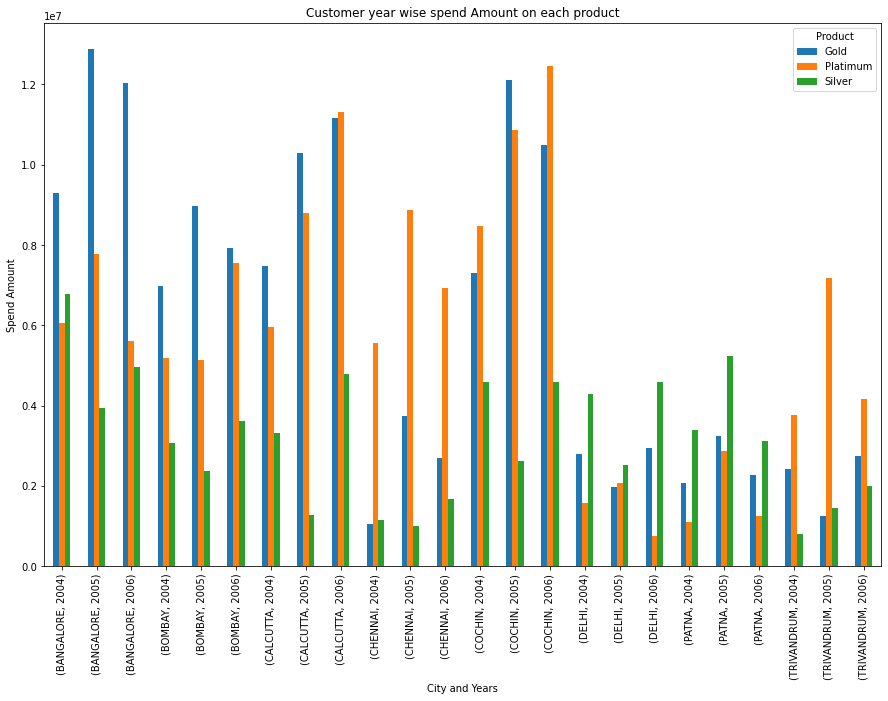

In [54]:
cust_spend_summ1.plot(kind = 'bar' , figsize =(15 , 10) )
plt.ylabel('Spend Amount')
plt.xlabel('City and Years')
plt.title('Customer year wise spend Amount on each product')
plt.show()

#### 4. Create graphs for
     a. Monthly comparison of total spends, city wise
     b. Comparison of yearly spend on air tickets
     c. Comparison of monthly spend for each product (look for any seasonality
     that exists in terms of spend)

##### a. Monthly comparison of total spends, city wise

In [55]:
cust_spend1.pivot_table(index = ['Yearly' , 'Monthly'] , columns = 'City' , values = 'Amount' , aggfunc = 'sum')

City                BANGALORE      BOMBAY     CALCUTTA     CHENNAI  \
Yearly Monthly                                                       
2004   April       2281291.38   479946.78    863402.79         NaN   
       February    1431538.82  1426496.18    720833.93         NaN   
       January    16628211.11  9887621.11  12811168.69  6013586.27   
       March        263829.55   819832.78    628186.11   427931.80   
       May          783277.82   104771.98    239397.51    14664.26   
       November     265031.35  1824670.94    787581.95         NaN   
       September    457364.09   705899.84    709699.03  1318138.22   
2005   April       1031501.72   628448.65   1328069.30   601251.30   
       August      1527037.76   532417.19   1011083.39         NaN   
       December     406564.93         NaN    289182.73         NaN   
       February    7707093.02  4408637.32   7918277.14  4402426.53   
       January      686759.38   794233.49    510400.40  1460699.23   
       July        1130088.15         NaN    538343.94   424981.02   
       June        1203876.57  1338395.95   1706758.12  1435879.93   
       May         7249363.75  5395076.20   4818996.33  4069952.94   
       November    2599970.25  2089759.72   1288419.50   984408.36   
       October      995667.68   169317.18          NaN         NaN   
       September     74702.68  1129183.03    989718.09   230322.18   
2006   April       2869288.62  2617986.91   4692360.87  2629893.08   
       August        25860.69   534327.56   1168211.46   681577.16   
       December     315909.04   604939.17    167643.95   223628.27   
       February     737229.03  1978401.11   2810475.63  1463981.82   
       January      467517.17         NaN    841815.29   175283.18   
       July        2607324.94   612457.59   1784917.49   761686.35   
       June         178862.84   148016.23    986665.42   467923.97   
       March      10501943.91  9037867.04   9447929.75  3985938.72   
       May         2711027.33  1475083.69   2809636.46   338006.16   
       November     570744.05  1206234.89   1414770.46   363370.92   
       October      859408.75   878244.21    622463.42   156247.17   
       September    774345.24         NaN    509350.86    43209.23   

City                   COCHIN       DELHI       PATNA  TRIVANDRUM  
Yearly Monthly                                                     
2004   April       1845395.35   361090.17   266851.54   489639.03  
       February     902389.12   779542.29   155562.58   777664.64  
       January    14510283.88  6365420.09  5566333.56  5492980.37  
       March        252348.36   389044.96   468872.11         NaN  
       May         1202491.57   376349.64   126813.36   197783.17  
       November     747488.65   147669.99         NaN    14366.69  
       September    916024.15   245802.04         NaN         NaN  
2005   April        726263.05   841565.93  1568749.51   335227.68  
       August      1688826.64   445572.82   778231.41   561400.55  
       December     582414.61   260064.61   223902.41   302913.55  
       February    6070650.22  2217931.58  2824860.90  3056906.30  
       January     3196698.45         NaN  1352189.32   195778.17  
       July         404152.39         NaN         NaN   710067.79  
       June        2435901.01   603682.58  1479829.69   828576.89  
       May         6172816.47  1132115.04  2579230.01  2979961.42  
       November    2891535.85   982915.00   352324.46   828686.42  
       October     1199907.56    64615.46   221293.03    73160.06  
       September    217400.85         NaN         NaN         NaN  
2006   April       4498449.43  1642520.65   950677.78  1950905.61  
       August       894170.44    30320.99    35327.74         NaN  
       December    1429359.71   707104.88         NaN   338008.71  
       February    2486327.74    74569.98   486303.28   624758.36  
       January      985624.27  1008374.28   470197.90         NaN  
       July        1353870.63   488399.04   191003.23   250

##### b. Comparison of yearly spend on air tickets

In [56]:
spend_air = spend[spend.Type == 'AIR TICKET']
spend_air

Sl No: Customer      Month        Type     Amount   Monthly  Yearly
10        11      A11 2005-02-23  AIR TICKET  307622.01  February    2005
29        30      A30 2006-05-10  AIR TICKET   24399.98       May    2006
40        41      A41 2005-05-27  AIR TICKET  359764.34       May    2005
55        56      A56 2006-02-03  AIR TICKET   22463.65  February    2006
70        71      A69 2005-01-17  AIR TICKET  113339.36   January    2005
...      ...      ...        ...         ...        ...       ...     ...
1426    1427      A39 2005-02-16  AIR TICKET  211569.74  February    2005
1448    1449      A61 2005-08-12  AIR TICKET  487680.73    August    2005
1462    1463      A45 2005-06-01  AIR TICKET  443959.84      June    2005
1477    1478      A60 2006-07-03  AIR TICKET  273977.69      July    2006
1491    1492      A63 2005-02-28  AIR TICKET  244678.86  February    2005

[147 rows x 7 columns]

In [57]:
spend_air.pivot_table(index = 'Yearly' , columns = 'Type' , values = 'Amount' , aggfunc = 'sum')

Type     AIR TICKET
Yearly             
2004     8370914.59
2005    14495718.73
2006    10088812.10

##### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [58]:
cust_spend_prod = cust_spend1.pivot_table(index = ['Yearly' , 'Monthly'] , columns = 'Product' , values = 'Amount' , aggfunc = 'sum')
cust_spend_prod

Product                  Gold     Platimum       Silver
Yearly Monthly                                         
2004   April       2690380.77   1819712.63   2077523.64
       February    3198850.31   1769237.83   1225939.42
       January    28837092.88  28795654.56  19642857.64
       March       1092661.79   1030013.96   1127369.92
       May         1601677.48    818552.99    625318.84
       November     659981.60   1629263.62   1497564.35
       September   1343862.61   1816183.55   1192881.21
2005   April       2646922.16   3097516.32   1316638.66
       August      2925282.74   2581877.78   1037409.24
       December     664762.18   1001201.85    399078.81
       February   17359157.23  15601838.88   5645786.90
       January     3111426.90   4068395.95   1016935.59
       July        1121173.40   1402579.46    683880.43
       June        5250066.70   4151149.69   1631684.35
       May        14024090.17  14692437.76   5680984.23
       November    5233151.27   4730264.46   2054603.83
       October      970641.36   1258725.24    494594.37
       September   1181458.46   1006207.63    453660.74
2006   April       7833269.66   7881269.39   6137543.90
       August      2028747.68   1310727.37     30320.99
       December    1668178.78   1950771.00    167643.95
       February    4221172.01   4710335.03   1730539.91
       January      465312.05   2348476.45   1135023.59
       July        4046242.97   2292518.91   1711380.89
       June        1288795.94    605268.93    587468.54
       March      18164310.69  21609423.74  13861305.94
       May         5922402.11   3869610.22   3433101.13
       November    3310134.59   1618324.40    191097.13
       October     2047582.02   1258326.67          NaN
       September   1291566.55    588886.95    338827.77

Text(0.5, 1.0, 'Year wise Monthly trend of Amount spend by Customers')

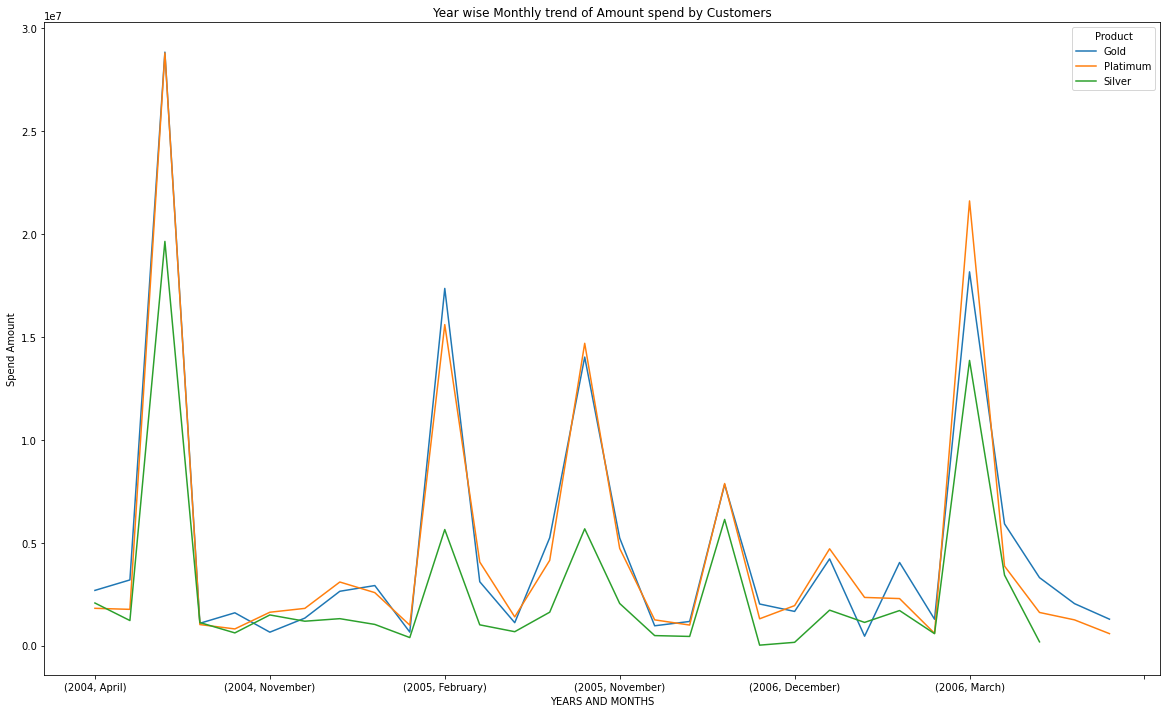

In [59]:
cust_spend_prod.plot(kind = 'line' , figsize = (20,12))
plt.ylabel('Spend Amount')
plt.xlabel('YEARS AND MONTHS')
plt.title('Year wise Monthly trend of Amount spend by Customers')

### As per the above chart , there is clear indication that the spend by customers in the second quarter of every year tends to be high in comparison of other months of the year. And this trend occurs every year between 2004-2006.

#### 5. Write user defined PYTHON function to perform the following analysis:
        You need to find top 10 customers for each city in terms of their repayment amount by
        different products and by different time periods i.e. year or month. The user should be able
        to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
        function should automatically take these inputs while identifying the top 10 customers.

In [66]:
cust_repay1 = pd.merge(left = cust_acq , right = repayment , how = 'inner' , on = "Customer")
cust_repay1.head()

No Customer   Age       City Product     Limit Company        Segment  \
0   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
1   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
2   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
3   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   
4   1       A1  76.0  BANGALORE    Gold  500000.0      C1  Self Employed   

   SL No:      Month     Amount  Unnamed: 4 Monthly1  Yearly1  
0     NaN 2004-01-12  495414.75         NaN  January   2004.0  
1     2.0 2004-01-03  245899.02         NaN  January   2004.0  
2     3.0 2004-01-15  259490.06         NaN  January   2004.0  
3     4.0 2004-01-25  437555.12         NaN  January   2004.0  
4     5.0 2005-01-17  165972.88         NaN  January   2005.0

In [93]:
def repay_summ(product,timeperiod):
    if product == 'gold' and timeperiod == 'monthly':
        pivot = cust_repay1.pivot_table(index = ['Product' , 'City' , 'Customer'] , columns = 'Monthly1' , values = 'Amount' , aggfunc = 'sum' , sort = True)
        result = pivot.loc[('Gold' ,['BANGALORE','CALCUTTA','COCHIN','BOMBAY','DELHI','PATNA','CHENNAI','TRIVANDRUM']),:]
    elif product == 'gold' and timeperiod == 'yearly':
        pivot = cust_repay1.pivot_table(index = ['Product' , 'City' , 'Customer'] , columns = 'Yearly1' , values = 'Amount' , aggfunc = 'sum')
        result = pivot.loc[('Gold' ,['BANGALORE','CALCUTTA','COCHIN','BOMBAY','DELHI','PATNA','CHENNAI','TRIVANDRUM']),:]
    elif product == 'silver' and timeperiod == 'monthly':
        pivot = cust_repay1.pivot_table(index = ['Product' , 'City' , 'Customer'] , columns = 'Monthly1' , values = 'Amount' , aggfunc = 'sum')
        result = pivot.loc[('Silver' ,['BANGALORE','CALCUTTA','COCHIN','BOMBAY','DELHI','PATNA','CHENNAI','TRIVANDRUM']),:]
    elif product == 'silver' and timeperiod == 'yearly':
        pivot = cust_repay1.pivot_table(index = ['Product' , 'City' , 'Customer'] , columns = 'Yearly1' , values = 'Amount' , aggfunc = 'sum')
        result = pivot.loc[('Silver' ,['BANGALORE','CALCUTTA','COCHIN','BOMBAY','DELHI','PATNA','CHENNAI','TRIVANDRUM']),:]
    elif product == 'platimum' and timeperiod == 'monthly':
        pivot = cust_repay1.pivot_table(index = ['Product' , 'City' , 'Customer'] , columns = 'Monthly1' , values = 'Amount' , aggfunc = 'sum')
        result = pivot.loc[('Platimum' ,['BANGALORE','CALCUTTA','COCHIN','BOMBAY','DELHI','PATNA','CHENNAI','TRIVANDRUM']),:]
    elif product == 'platimum' and timeperiod == 'yearly':
        pivot = cust_repay1.pivot_table(index = ['Product' , 'City' , 'Customer'] , columns = 'Yearly1' , values = 'Amount' , aggfunc = 'sum')
        result = pivot.loc[('Platimum' ,['BANGALORE','CALCUTTA','COCHIN','BOMBAY','DELHI','PATNA','CHENNAI','TRIVANDRUM']),:]
    return result
    

In [94]:
repay_summ('gold','monthly')

Monthly1                          April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   

Monthly1                        January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        CALCUTTA   A10       1091589.54   358194.65        Na